<h2>1. Problem definition</h2>

We want to do Laptop price prediction based on its configuration. So if any user wants to buy a laptop then the application should be compatible to provide a tentative price of laptop according to the user configurations. 

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
import pickle
import shap


C:\Users\zhuy\AppData\Roaming\Python\Python38\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<h2>2. Data overview</h2>

In [1]:

df = pd.read_csv('laptop_data.csv')

df.shape

(1303, 12)

In [2]:
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [5]:
#drop the unamed column
df.drop(columns=['Unnamed: 0'],inplace=True)

<h2>3. EDA</h2>

<h3>Price</h3>

In [11]:
#target = Price
df.Price.describe()

count      1303.000000
mean      59870.042910
std       37243.201786
min        9270.720000
25%       31914.720000
50%       52054.560000
75%       79274.246400
max      324954.720000
Name: Price, dtype: float64

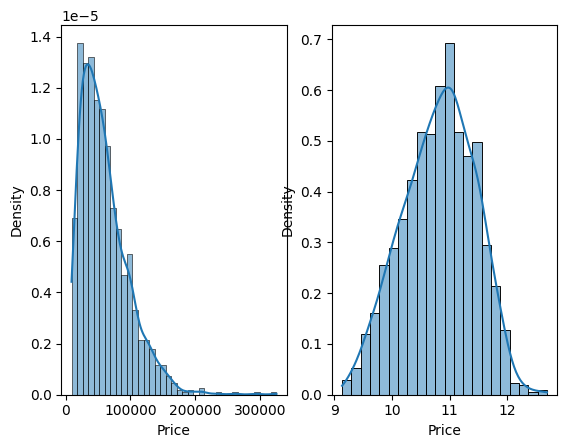

In [73]:
fig, (ax1, ax2) = plt.subplots(1,2)

sns.histplot(df['Price'],kde=True, stat='density',ax=ax1)

sns.histplot(np.log(df['Price']),kde=True, stat='density',ax=ax2)

plt.show()

The distribution of the target variable 'Price' is skewed and it is obvious that commodities with low prices are sold and purchased more than the higher priced ones.

<h3>Company</h3>

In [15]:
df.Company.describe()

count     1303
unique      19
top       Dell
freq       297
Name: Company, dtype: object

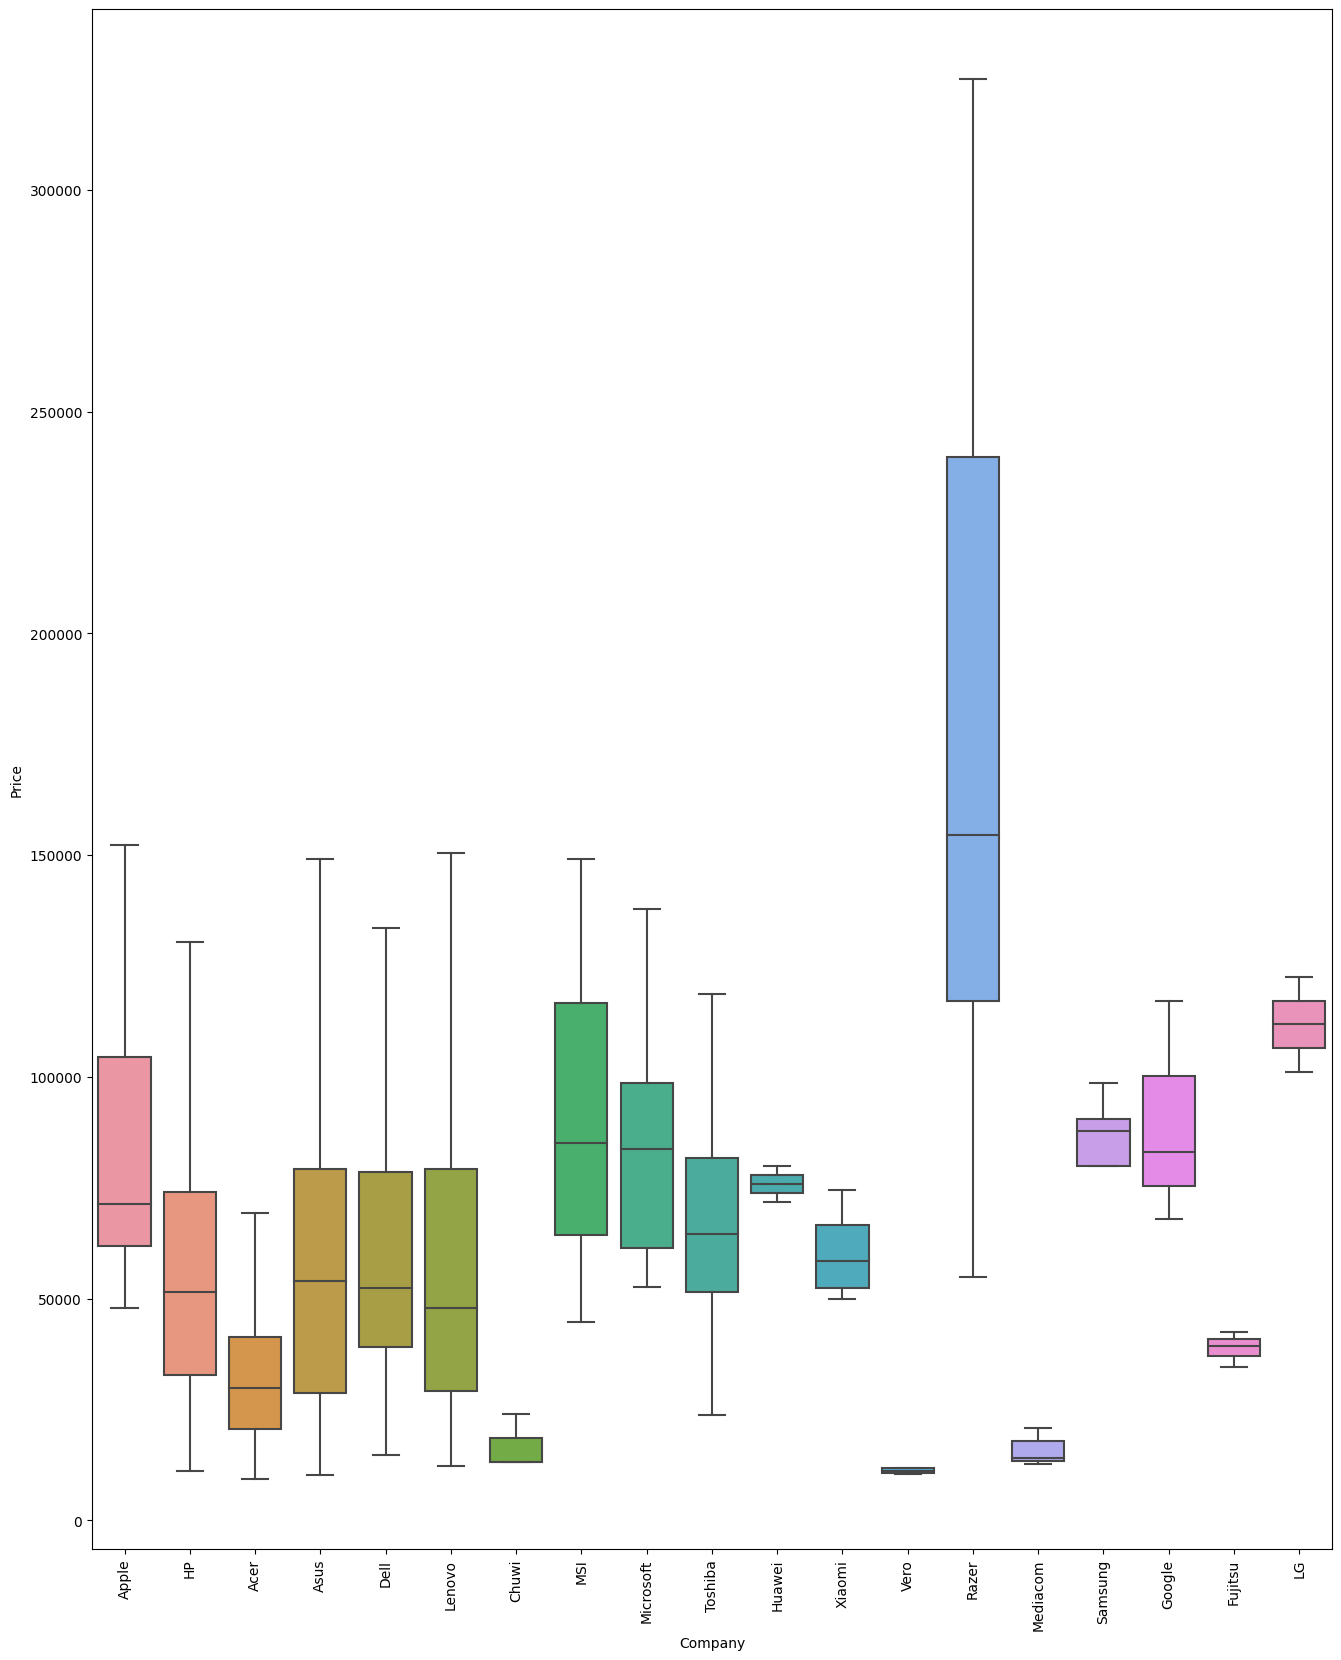

In [23]:
fig, ax = plt.subplots(figsize=(16,20))
sns.boxplot(y='Price', x='Company', data=df, showfliers=False, ax=ax)

plt.xticks(rotation="vertical")
plt.show()

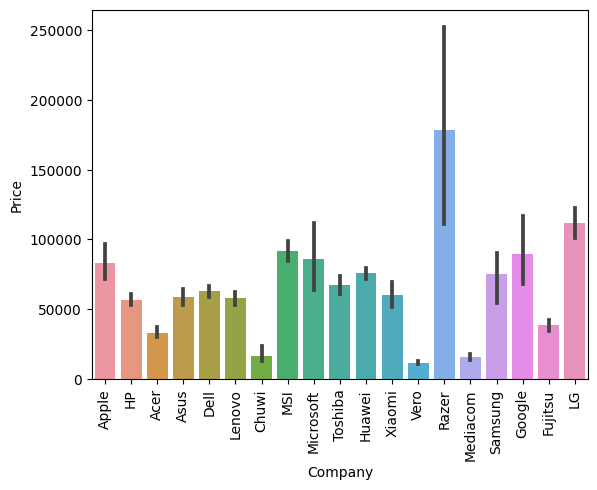

In [19]:
sns.barplot(x=df['Company'], y=df['Price'])

plt.xticks(rotation="vertical")

plt.show()

Razer, LG, Apple, Microsoft, Google, MSI laptops are expensive, and others are in the budget range.

<h3>Type</h3>

In [25]:
df.TypeName.describe()

count         1303
unique           6
top       Notebook
freq           727
Name: TypeName, dtype: object

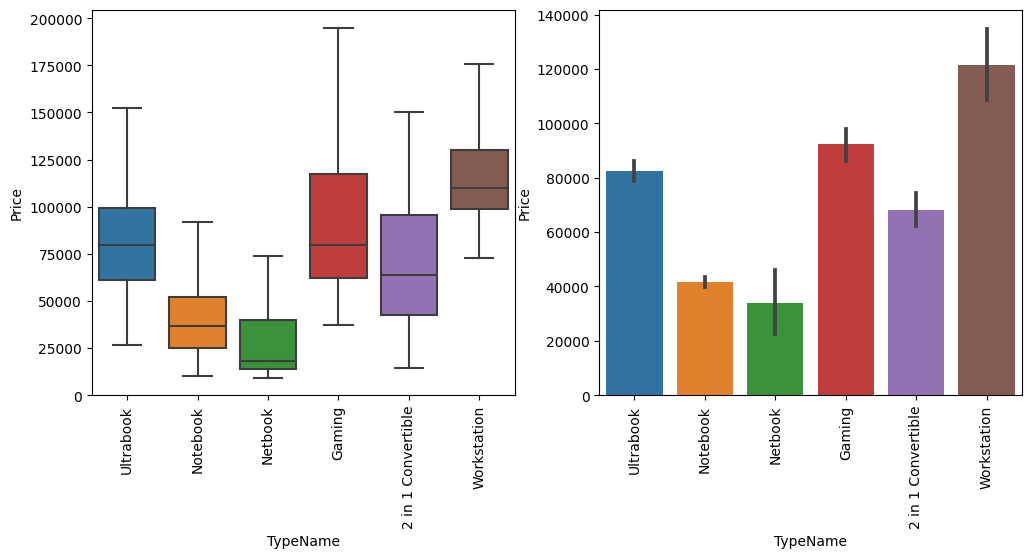

In [48]:
fig, [ax1, ax2] = plt.subplots(1,2,figsize=(12,5))
sns.boxplot(y='Price', x='TypeName', data=df, showfliers=False, ax=ax1)
ax1.tick_params(axis="x",labelrotation=90)
sns.barplot(x=df['TypeName'], y=df['Price'], ax=ax2)
ax2.tick_params(axis="x",labelrotation=90)

plt.show()

<h3>Inches</h3>

In [50]:
df.Inches.describe()

count    1303.000000
mean       15.017191
std         1.426304
min        10.100000
25%        14.000000
50%        15.600000
75%        15.600000
max        18.400000
Name: Inches, dtype: float64

<AxesSubplot:xlabel='Inches', ylabel='Price'>

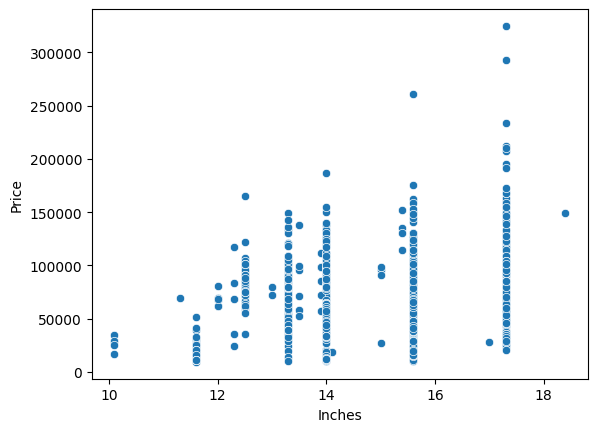

In [49]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

<h3>ScreenResolution</h3>

In [51]:
df.ScreenResolution.describe()

count                  1303
unique                   40
top       Full HD 1920x1080
freq                    507
Name: ScreenResolution, dtype: object

Need to do feature engineering to extract the userful features

<h3>Cpu</h3>

In [52]:
df.Cpu.describe()

count                           1303
unique                           118
top       Intel Core i5 7200U 2.5GHz
freq                             190
Name: Cpu, dtype: object

Need to do feature engineering to extract the userful features

<h3>Ram</h3>

In [53]:
df.Ram.describe()

count     1303
unique       9
top        8GB
freq       619
Name: Ram, dtype: object

In [54]:
df['Ram'] = df['Ram'].str.replace("GB", "").astype('int32')

In [57]:
df.Ram

0        8
1        8
2        8
3       16
4        8
        ..
1298     4
1299    16
1300     2
1301     6
1302     4
Name: Ram, Length: 1303, dtype: int32

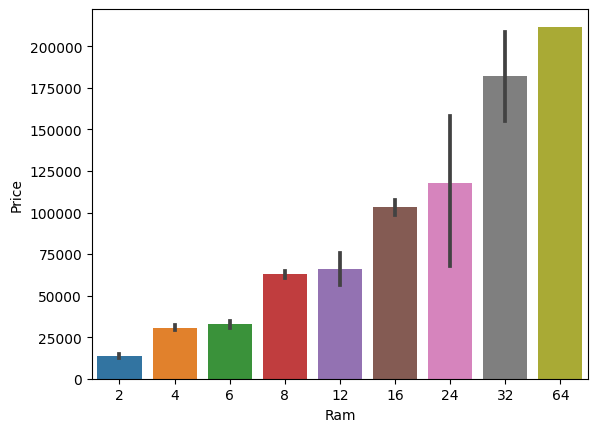

In [59]:


sns.barplot(x=df['Ram'], y=df['Price'])
plt.show()

Price is having a very strong positive correlation with Ram or you can say a linear relationship

<h3>Memory</h3>

In [61]:
df.Memory.describe()

count          1303
unique           39
top       256GB SSD
freq            412
Name: Memory, dtype: object

Need to do feature engineering to extract the userful features

<h3>GPU</h3>

In [63]:
df.Gpu.describe()

count                      1303
unique                      110
top       Intel HD Graphics 620
freq                        281
Name: Gpu, dtype: object

Need to do feature engineering to extract the userful features

<h3>OpSys</h3>

In [64]:
df.OpSys.describe()

count           1303
unique             9
top       Windows 10
freq            1072
Name: OpSys, dtype: object

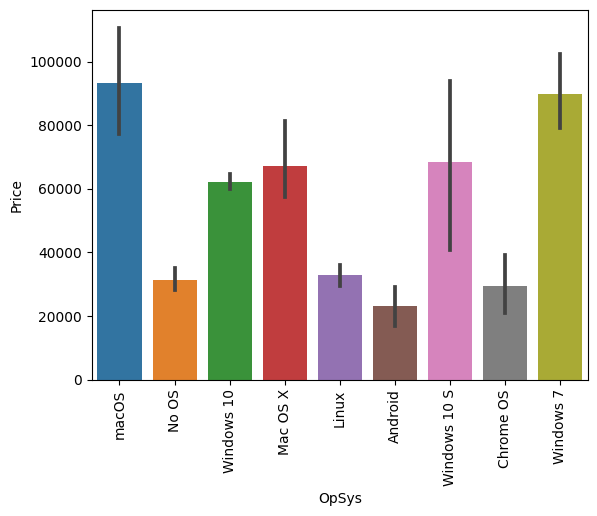

In [67]:
sns.barplot(x=df['OpSys'], y=df['Price'])
plt.xticks(rotation="vertical")
plt.show()

<h3>Weight</h3>

In [70]:
df['Weight'] = df['Weight'].str.replace("kg", "").astype('float32')

<AxesSubplot:xlabel='Weight', ylabel='Price'>

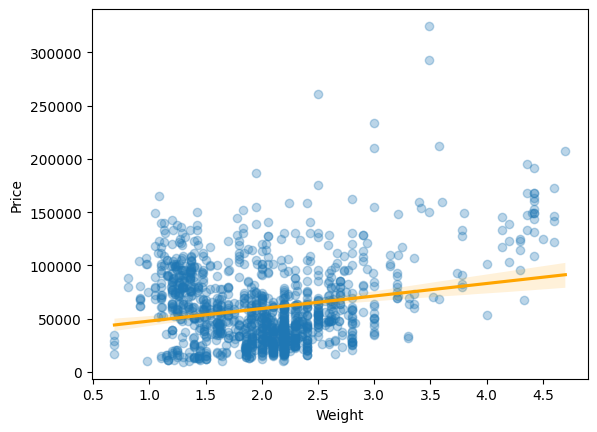

In [72]:
#sns.scatterplot(x=df['Weight'],y=df['Price'])
sns.regplot(x='Weight', y='Price', data=df,
            scatter_kws={'alpha':0.3},line_kws={'color':'orange'})

<h2>3. Feature Engineering</h2>

<h3>ScreenResolution</h3>

1) Extract touch screen info

<AxesSubplot:xlabel='Touchscreen', ylabel='Price'>

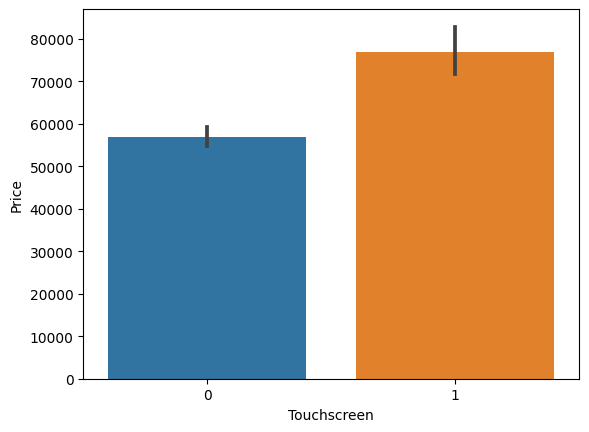

In [75]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
#how many laptops in data are touchscreen
sns.countplot(df['Touchscreen'])
#Plot against price
sns.barplot(x=df['Touchscreen'],y=df['Price'])

2) Extract IPS Channel presence information

<AxesSubplot:xlabel='Ips', ylabel='Price'>

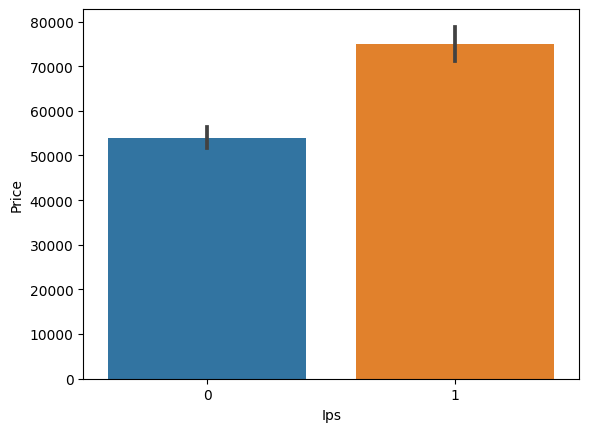

In [77]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
sns.barplot(x=df['Ips'],y=df['Price'])

3) Extract X-axis and Y-axis screen resolution dimensions

In [78]:
def findXresolution(s):
  return s.split()[-1].split("x")[0]
def findYresolution(s):
  return s.split()[-1].split("x")[1]

df['X_res'] = df['ScreenResolution'].apply(lambda x: findXresolution(x))
df['Y_res'] = df['ScreenResolution'].apply(lambda y: findYresolution(y))

4) Combine Inch and x-axis, y-axis screen resolution into PPI

In [ ]:
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')


<h3>CPU</h3>

The information it gives is about preprocessors in laptops and speed.

In [79]:
def fetch_processor(x):
  cpu_name = " ".join(x.split()[0:3])
  if cpu_name == 'Intel Core i7' or cpu_name == 'Intel Core i5' or cpu_name == 'Intel Core i3':
    return cpu_name
  elif cpu_name.split()[0] == 'Intel':
    return 'Other Intel Processor'
  else:
    return 'AMD Processor'
df['Cpu_brand'] = df['Cpu'].apply(lambda x: fetch_processor(x))

In [88]:
def findCpuFreq(s):
  return float(s.split()[-1].strip("GHz"))

df['Cpu_freq'] = df['Cpu'].apply(lambda x: findCpuFreq(x))

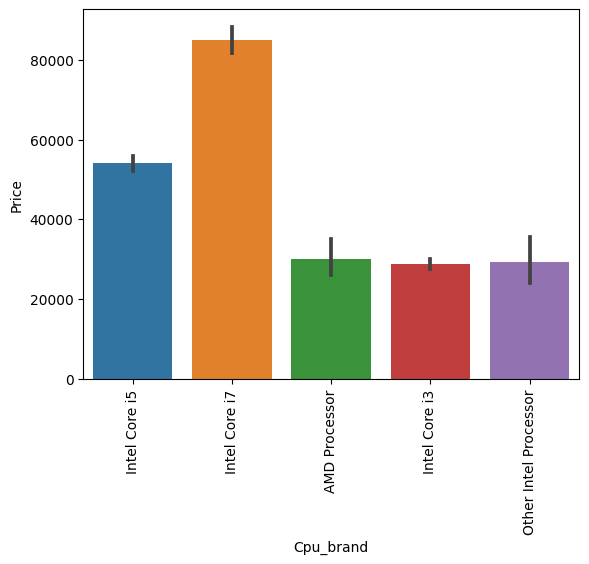

In [82]:
sns.barplot(x=df['Cpu_brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='Cpu_freq', ylabel='Price'>

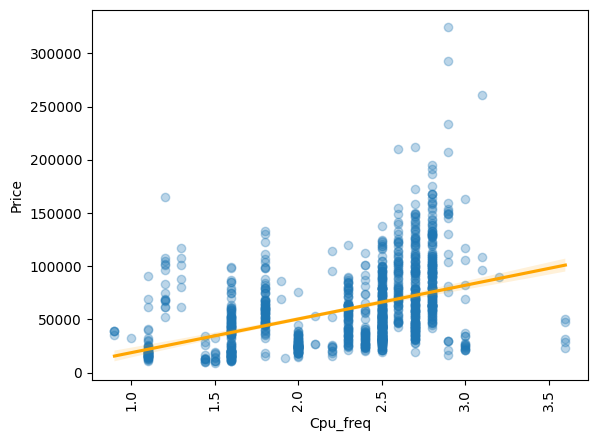

In [90]:
plt.xticks(rotation='vertical')
sns.regplot(x='Cpu_freq', y='Price', data=df,
            scatter_kws={'alpha':0.3},line_kws={'color':'orange'})
#sns.barplot(x=df['Cpu_freq'],y=df['Price'])

<h3>Memory</h3>

In [102]:
df.Memory.head(20)

0               128GB SSD
1     128GB Flash Storage
2               256GB SSD
3               512GB SSD
4               256GB SSD
5               500GB HDD
6     256GB Flash Storage
7     256GB Flash Storage
8               512GB SSD
9               256GB SSD
10              500GB HDD
11              500GB HDD
12              256GB SSD
13              256GB SSD
14              256GB SSD
15              256GB SSD
16              256GB SSD
17              512GB SSD
18                1TB HDD
19              128GB SSD
Name: Memory, dtype: object

In [160]:
#preprocessing
data = pd.DataFrame()
data['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
#data['Memory'] = df['Memory']
data["Memory"] = data["Memory"].str.replace('GB', '')
data["Memory"] = data["Memory"].str.replace('TB', '000')
new = data["Memory"].str.split("+", n = 1, expand = True)

data["first"]= new[0]
data["first"]=data["first"].str.strip()
data["second"]= new[1]
data["Layer1HDD"] = data["first"].apply(lambda x: 1 if "HDD" in x else 0)
data["Layer1SSD"] = data["first"].apply(lambda x: 1 if "SSD" in x else 0)
data["Layer1Hybrid"] = data["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["Layer1Flash_Storage"] = data["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

#data['first'].head(20)
new1 = data['first'].str.split(' ', expand=True)
data['first'] = new1[0]

data["second"].fillna("0", inplace = True)
data["Layer2HDD"] = data["second"].apply(lambda x: 1 if "HDD" in x else 0)
data["Layer2SSD"] = data["second"].apply(lambda x: 1 if "SSD" in x else 0)
data["Layer2Hybrid"] = data["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["Layer2Flash_Storage"] = data["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [161]:
#only keep integert(digits)
#data['second'] = data['second'].str.replace(r'D', '')
new3 = data['second'].str.split(' ', expand=True)
new3.head(30)
data['second'] = new3[2]
data.head(30)
data["second"].fillna("0", inplace = True)

In [164]:

#convert to numeric
data["first"] = data["first"].astype(int)
data["second"] = data["second"].astype(int)
#finalize the columns by keeping value
data["HDD"]=(data["first"]*data["Layer1HDD"]+data["second"]*data["Layer2HDD"])
data["SSD"]=(data["first"]*data["Layer1SSD"]+data["second"]*data["Layer2SSD"])
data["Hybrid"]=(data["first"]*data["Layer1Hybrid"]+data["second"]*data["Layer2Hybrid"])
data["Flash_Storage"]=(data["first"]*data["Layer1Flash_Storage"]+data["second"]*data["Layer2Flash_Storage"])

In [165]:
data.head(30)

,Memory,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage,HDD,SSD,Hybrid,Flash_Storage
0,128 SSD,128,0,0,1,0,0,0,0,0,0,0,128,0,0
1,128 Flash Storage,128,0,0,0,0,1,0,0,0,0,0,0,0,128
2,256 SSD,256,0,0,1,0,0,0,0,0,0,0,256,0,0
3,512 SSD,512,0,0,1,0,0,0,0,0,0,0,512,0,0
4,256 SSD,256,0,0,1,0,0,0,0,0,0,0,256,0,0
5,500 HDD,500,0,1,0,0,0,0,0,0,0,500,0,0,0
6,256 Flash Storage,256,0,0,0,0,1,0,0,0,0,0,0,0,256
7,256 Flash Storage,256,0,0,0,0,1,0,0,0,0,0,0,0,256
8,512 SSD,512,0,0,1,0,0,0,0,0,0,0,512,0,0
9,256 SSD,256,0,0,1,0,0,0,0,0,0,0,256,0,0


<AxesSubplot:xlabel='SSD', ylabel='Price'>

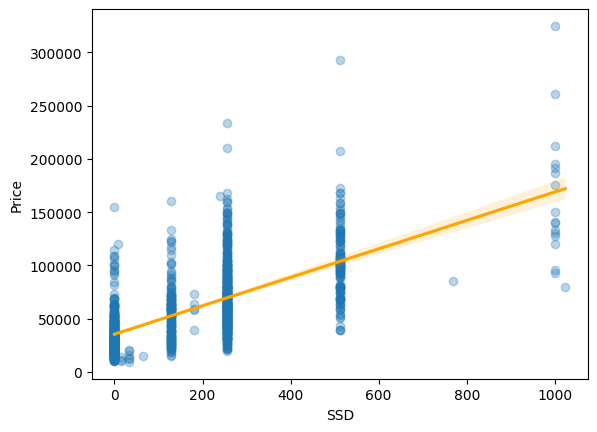

In [169]:
df['SSD'] = data['SSD']

sns.regplot(x='SSD', y='Price', data=df,
            scatter_kws={'alpha':0.3},line_kws={'color':'orange'})

<AxesSubplot:xlabel='HDD', ylabel='Price'>

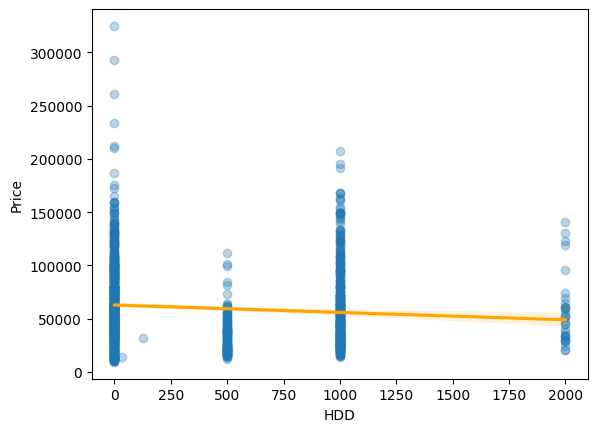

In [170]:
df['HDD'] = data['HDD']

sns.regplot(x='HDD', y='Price', data=df,
            scatter_kws={'alpha':0.3},line_kws={'color':'orange'})

<AxesSubplot:xlabel='Flash_Storage', ylabel='Price'>

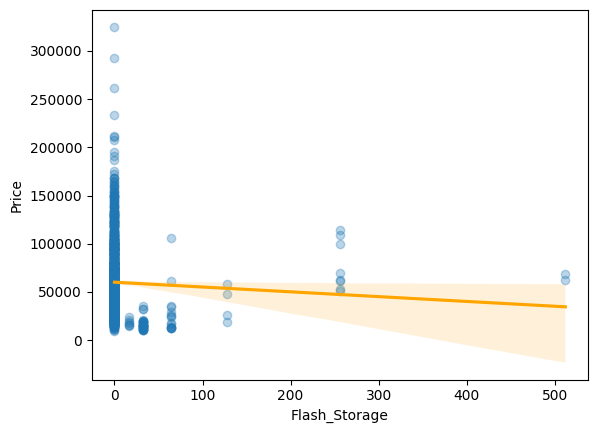

In [167]:
df['Flash_Storage'] = data['Flash_Storage']

sns.regplot(x='Flash_Storage', y='Price', data=df,
            scatter_kws={'alpha':0.3},line_kws={'color':'orange'})

<AxesSubplot:xlabel='Hybrid', ylabel='Price'>

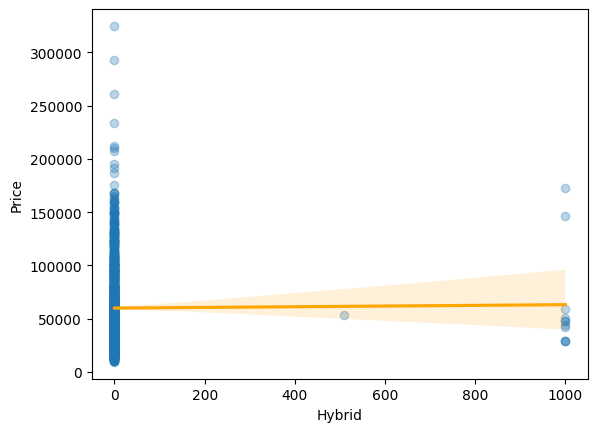

In [168]:
df['Hybrid'] = data['Hybrid']

sns.regplot(x='Hybrid', y='Price', data=df,
            scatter_kws={'alpha':0.3},line_kws={'color':'orange'})

<h3>GPU</h3>

only use brands 

In [ ]:
df['Gpu_brand'] = df['Gpu'].apply(lambda x:x.split()[0])

<h2>4. Feature Selection</h2>

In [6]:
#Transformer: remove gb and kg from Ram and weight and convert the cols to numeric

class Transformer(object):
    
    def fit(self, X, y=None):
                
        df = pd.DataFrame()
        df['Company'] = X.Company
        df['TypeName'] = X.TypeName
        df['Inches'] = X.Inches
        df['Touchscreen'] = X.ScreenResolution.apply(lambda x:1 if 'Touchscreen' in x else 0)
        df['Ips'] = X.ScreenResolution.apply(lambda x:1 if 'IPS' in x else 0)
        df['X_res'] = X.ScreenResolution.apply(lambda x: self.findXresolution(x))
        df['Y_res'] = X.ScreenResolution.apply(lambda y: self.findYresolution(y))
        df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')
        df['Cpu_brand'] = X.Cpu.apply(lambda x: self.fetch_processor(x))
        df['Cpu_freq'] = X.Cpu.apply(lambda x: self.findCpuFreq(x))
        df['Ram'] = X.Ram.map(self.ram2num)
        self.getMemoryInfo(X,df)
        df['Gpu_brand'] = X.Gpu.apply(lambda x:x.split()[0])
        df['OpSys'] = X.OpSys
        df['Weight'] = X.Weight.map(self.weight2num)               
        
        
    def transform(self, X, y=None):        
        df = pd.DataFrame()
        df['Company'] = X.Company
        df['TypeName'] = X.TypeName
        df['Inches'] = X.Inches
        df['Touchscreen'] = X.ScreenResolution.apply(lambda x:1 if 'Touchscreen' in x else 0)
        df['Ips'] = X.ScreenResolution.apply(lambda x:1 if 'IPS' in x else 0)
        df['X_res'] = X.ScreenResolution.apply(lambda x: self.findXresolution(x))
        df['Y_res'] = X.ScreenResolution.apply(lambda y: self.findYresolution(y))
        df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')
        df['Cpu_brand'] = X.Cpu.apply(lambda x: self.fetch_processor(x))
        df['Cpu_freq'] = X.Cpu.apply(lambda x: self.findCpuFreq(x))
        df['Ram'] = X.Ram.map(self.ram2num)
        self.getMemoryInfo(X,df)
        df['Gpu_brand'] = X.Gpu.apply(lambda x:x.split()[0])
        df['OpSys'] = X.OpSys
        df['Weight'] = X.Weight.map(self.weight2num)
        return df
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

    
    def findXresolution(self, s):
        return float(s.split()[-1].split("x")[0])
    
    def findYresolution(self, s):
        return float(s.split()[-1].split("x")[1])
    
    def fetch_processor(self, x):
        cpu_name = " ".join(x.split()[0:3])
        if cpu_name == 'Intel Core i7' or cpu_name == 'Intel Core i5' or cpu_name == 'Intel Core i3':
            return cpu_name
        elif cpu_name.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'
    def findCpuFreq(self, s):
        return float(s.split()[-1].strip("GHz"))

    def getMemoryInfo(self, X, df):
        
        df['Memory'] = X.Memory.astype(str).replace('\.0', '', regex=True)
        df["Memory"] = df["Memory"].str.replace('GB', '')
        df["Memory"] = df["Memory"].str.replace('TB', '000')
        new = df["Memory"].str.split("+", n = 1, expand = True)    
        df["first"] = new[0]
        df["second"]= new[1]    
        
        df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
        df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
        df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
        df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)
        
        df["first"]=df["first"].str.strip()
        new1 = df['first'].str.split(' ', expand=True)
        df['first'] = new1[0] 

        df["second"].fillna("0", inplace = True)
        df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
        df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
        df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
        df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)
        new3 = df['second'].str.split(' ', expand=True)
        df['second'] = new3[2]
        df["second"].fillna("0", inplace = True)
        
        #convert to numeric
        df["first"] = df["first"].astype(int)
        df["second"] = df["second"].astype(int)
        #finalize the columns by keeping value
        df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
        df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
        df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
        df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])
    
    
    def ram2num(self, x):
        if type(x) == str: 
            x = x.strip('GB')
            return float(x)
        else:
            return x
       
    def weight2num(self, x):       
        if type(x) == str:
            x = x.replace("kg", "")
            return float(x)
        else:
            return x




In [4]:
!pip install xgboost

  Using cached xgboost-1.7.2-py3-none-win_amd64.whl (89.1 MB)


In [7]:
steps = [("ctf", Transformer())]

model = Pipeline(steps)

'''Assign X_train'''

df = pd.read_csv('laptop_data.csv')

X_all = pd.DataFrame()
X_all = model.fit_transform(df)

In [8]:
X_all.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [9]:
X_all.head(30)

,Company,TypeName,Inches,Touchscreen,Ips,X_res,Y_res,ppi,Cpu_brand,Cpu_freq,Ram,Memory,HDD,SSD,Hybrid,Flash_Storage,Gpu_brand,OpSys,Weight
0,Apple,Ultrabook,13.3,0,1,2560.0,1600.0,226.983005,Intel Core i5,2.30,8.0,128 SSD,0,128,0,0,Intel,macOS,1.37
1,Apple,Ultrabook,13.3,0,0,1440.0,900.0,127.677940,Intel Core i5,1.80,8.0,128 Flash Storage,0,0,0,128,Intel,macOS,1.34
2,HP,Notebook,15.6,0,0,1920.0,1080.0,141.211998,Intel Core i5,2.50,8.0,256 SSD,0,256,0,0,Intel,No OS,1.86
3,Apple,Ultrabook,15.4,0,1,2880.0,1800.0,220.534624,Intel Core i7,2.70,16.0,512 SSD,0,512,0,0,AMD,macOS,1.83
4,Apple,Ultrabook,13.3,0,1,2560.0,1600.0,226.983005,Intel Core i5,3.10,8.0,256 SSD,0,256,0,0,Intel,macOS,1.37
5,Acer,Notebook,15.6,0,0,1366.0,768.0,100.454670,AMD Processor,3.00,4.0,500 HDD,500,0,0,0,AMD,Windows 10,2.10
6,Apple,Ultrabook,15.4,0,1,2880.0,1800.0,220.534624,Intel Core i7,2.20,16.0,256 Flash Storage,0,0,0,256,Intel,Mac OS X,2.04
7,Apple,Ultrabook,13.3,0,0,1440.0,900.0,127.677940,Intel Core i5,1.80,8.0,256 Flash Storage,0,0,0,256,Intel,macOS,1.34
8,Asus,Ultrabook,14.0,0,0,1920.0,1080.0,157.350512,Intel Core i7,1.80,16.0,512 SSD,0,512,0,0,Nvidia,Windows 10,1.30
9,Acer,Ultrabook,14.0,0,1,1920.0,1080.0,157.350512,Intel Core i5,1.60,8.0,256 SSD,0,256,0,0,Intel,Windows 10,1.60


In [10]:
y_all = df.Price

<h3>Numeric features</h3>

<AxesSubplot: >

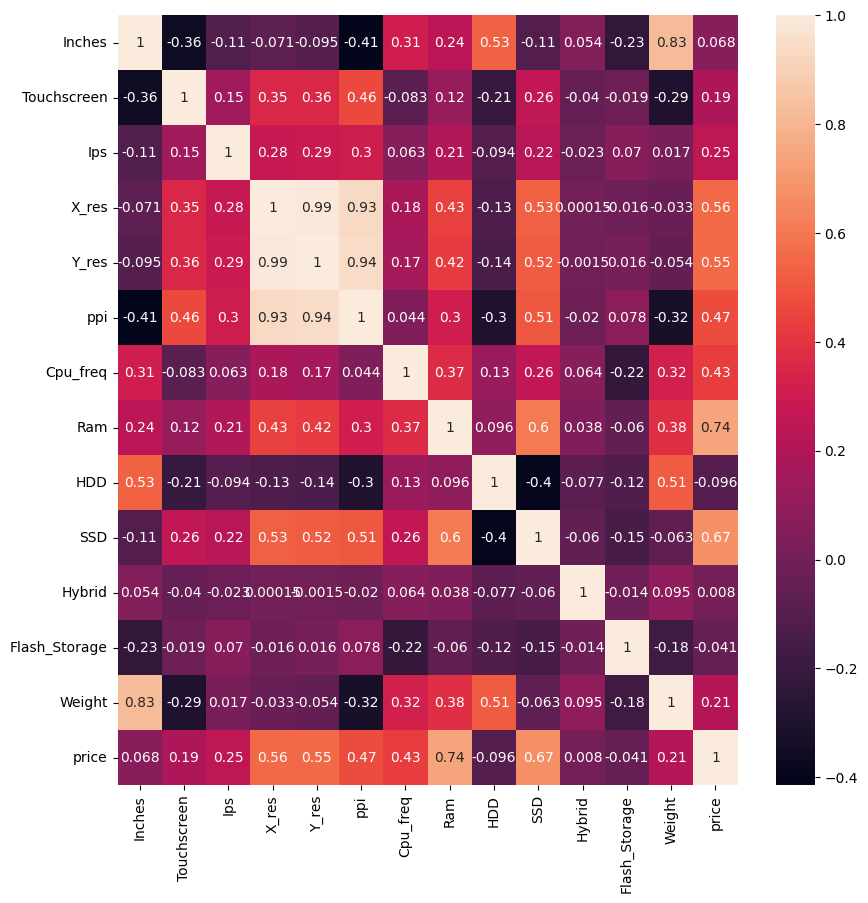

In [11]:
X_all_map = pd.DataFrame()

numeric_features = ['Inches','Touchscreen','Ips','X_res','Y_res','ppi','Cpu_freq','Ram','HDD','SSD','Hybrid','Flash_Storage', 'Weight']

X_all_map[numeric_features] = X_all[numeric_features]
X_all_map['price'] = y_all

fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(X_all_map.corr(), annot=True, ax=ax)

Flash_storage and Hybrid are not useful features for price according to the above heatmap, will drop them

In [12]:
X_all.drop(columns=['Hybrid','Flash_Storage','Memory',],inplace=True)

In [13]:
X_all

,Company,TypeName,Inches,Touchscreen,Ips,X_res,Y_res,ppi,Cpu_brand,Cpu_freq,Ram,HDD,SSD,Gpu_brand,OpSys,Weight
0,Apple,Ultrabook,13.3,0,1,2560.0,1600.0,226.983005,Intel Core i5,2.3,8.0,0,128,Intel,macOS,1.37
1,Apple,Ultrabook,13.3,0,0,1440.0,900.0,127.677940,Intel Core i5,1.8,8.0,0,0,Intel,macOS,1.34
2,HP,Notebook,15.6,0,0,1920.0,1080.0,141.211998,Intel Core i5,2.5,8.0,0,256,Intel,No OS,1.86
3,Apple,Ultrabook,15.4,0,1,2880.0,1800.0,220.534624,Intel Core i7,2.7,16.0,0,512,AMD,macOS,1.83
4,Apple,Ultrabook,13.3,0,1,2560.0,1600.0,226.983005,Intel Core i5,3.1,8.0,0,256,Intel,macOS,1.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,1,1,1920.0,1080.0,157.350512,Intel Core i7,2.5,4.0,0,128,Intel,Windows 10,1.80
1299,Lenovo,2 in 1 Convertible,13.3,1,1,3200.0,1800.0,276.053530,Intel Core i7,2.5,16.0,0,512,Intel,Windows 10,1.30
1300,Lenovo,Notebook,14.0,0,0,1366.0,768.0,111.935204,Other Intel Processor,1.6,2.0,0,0,Intel,Windows 10,1.50
1301,HP,Notebook,15.6,0,0,1366.0,768.0,100.454670,Intel Core i7,2.5,6.0,1000,0,AMD,Windows 10,2.19


In [14]:
y_all = np.log(y_all)

<h2>5. Model training</h2>

<h3>Split in train and test test</h3>

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X_all,y_all,test_size=0.15,random_state=2)

In [16]:
X_train.head()

,Company,TypeName,Inches,Touchscreen,Ips,X_res,Y_res,ppi,Cpu_brand,Cpu_freq,Ram,HDD,SSD,Gpu_brand,OpSys,Weight
183,Toshiba,Notebook,15.6,0,0,1366.0,768.0,100.454670,Intel Core i5,2.5,8.0,0,128,Intel,Windows 10,2.00
699,HP,Notebook,15.6,0,1,1920.0,1080.0,141.211998,Intel Core i7,2.7,4.0,500,0,AMD,Windows 10,2.10
419,Lenovo,Ultrabook,14.0,0,1,1920.0,1080.0,157.350512,Intel Core i7,1.8,8.0,0,256,AMD,Windows 10,1.75
997,Acer,Notebook,15.6,0,0,1366.0,768.0,100.454670,Other Intel Processor,1.1,4.0,500,0,Intel,Windows 10,2.40
502,Lenovo,2 in 1 Convertible,13.9,1,1,1920.0,1080.0,158.482530,Intel Core i5,1.6,8.0,0,256,Intel,Windows 10,1.40


<h3>Implement Pipeline for training and testing</h3>

In [17]:
class Transformer(object):
    
    def fit(self, X, y=None):
                
        df = pd.DataFrame()
        df['Company'] = X.Company
        df['TypeName'] = X.TypeName
        df['Inches'] = X.Inches
        df['Touchscreen'] = X.ScreenResolution.apply(lambda x:1 if 'Touchscreen' in x else 0)
        df['Ips'] = X.ScreenResolution.apply(lambda x:1 if 'IPS' in x else 0)
        df['X_res'] = X.ScreenResolution.apply(lambda x: self.findXresolution(x))
        df['Y_res'] = X.ScreenResolution.apply(lambda y: self.findYresolution(y))
        df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')
        df['Cpu_brand'] = X.Cpu.apply(lambda x: self.fetch_processor(x))
        df['Cpu_freq'] = X.Cpu.apply(lambda x: self.findCpuFreq(x))
        df['Ram'] = X.Ram.map(self.ram2num)
        self.getMemoryInfo(X,df)
        df['Gpu_brand'] = X.Gpu.apply(lambda x:x.split()[0])
        df['OpSys'] = X.OpSys
        df['Weight'] = X.Weight.map(self.weight2num)               
        
        
    def transform(self, X, y=None):        
        df = pd.DataFrame()
        df['Company'] = X.Company
        df['TypeName'] = X.TypeName
        df['Inches'] = X.Inches
        df['Touchscreen'] = X.ScreenResolution.apply(lambda x:1 if 'Touchscreen' in x else 0)
        df['Ips'] = X.ScreenResolution.apply(lambda x:1 if 'IPS' in x else 0)
        df['X_res'] = X.ScreenResolution.apply(lambda x: self.findXresolution(x))
        df['Y_res'] = X.ScreenResolution.apply(lambda y: self.findYresolution(y))
        df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')
        df['Cpu_brand'] = X.Cpu.apply(lambda x: self.fetch_processor(x))
        df['Cpu_freq'] = X.Cpu.apply(lambda x: self.findCpuFreq(x))
        df['Ram'] = X.Ram.map(self.ram2num)
        self.getMemoryInfo(X,df)
        df['Gpu_brand'] = X.Gpu.apply(lambda x:x.split()[0])
        df['OpSys'] = X.OpSys
        df['Weight'] = X.Weight.map(self.weight2num)
        return df
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

    
    def findXresolution(self, s):
        return float(s.split()[-1].split("x")[0])
    
    def findYresolution(self, s):
        return float(s.split()[-1].split("x")[1])
    
    def fetch_processor(self, x):
        cpu_name = " ".join(x.split()[0:3])
        if cpu_name == 'Intel Core i7' or cpu_name == 'Intel Core i5' or cpu_name == 'Intel Core i3':
            return cpu_name
        elif cpu_name.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'
    def findCpuFreq(self, s):
        return float(s.split()[-1].strip("GHz"))

    def getMemoryInfo(self, X, df):
        
        df['Memory'] = X.Memory.astype(str).replace('\.0', '', regex=True)
        df["Memory"] = df["Memory"].str.replace('GB', '')
        df["Memory"] = df["Memory"].str.replace('TB', '000')
        new = df["Memory"].str.split("+", n = 1, expand = True)    
        df["first"] = new[0]
        df["second"]= new[1]    
        
        df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
        df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
        df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
        df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)
        
        df["first"]=df["first"].str.strip()
        new1 = df['first'].str.split(' ', expand=True)
        df['first'] = new1[0] 

        df["second"].fillna("0", inplace = True)
        df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
        df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
        df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
        df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)
        new3 = df['second'].str.split(' ', expand=True)
        df['second'] = new3[2]
        df["second"].fillna("0", inplace = True)
        
        #convert to numeric
        df["first"] = df["first"].astype(int)
        df["second"] = df["second"].astype(int)
        #finalize the columns by keeping value
        df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
        df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
        df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
        df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])
    
    
    def ram2num(self, x):
        if type(x) == str: 
            x = x.strip('GB')
            return float(x)
        else:
            return x
       
    def weight2num(self, x):       
        if type(x) == str:
            x = x.replace("kg", "")
            return float(x)
        else:
            return x



step1 = ColumnTransformer(transformers=[

('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,8,13,14])

],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,

random_state=3,

max_samples=0.5,

max_features=0.75,

max_depth=15)

pipe = Pipeline([

('ctf',step1),

('rfr',step2)

])


In [18]:
pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))

print('MAE',mean_absolute_error(y_test,y_pred))

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


R2 score 0.9000539591134009
MAE 0.15122995686297597


<h3>Exporting the Model</h3>

In [19]:


X_all_data = pd.DataFrame()
X_all_data = X_all.copy()
X_all_data['Price'] = df['Price']
X_all_data.to_csv("df.csv", index=False)
pickle.dump(pipe,open('pipe.pkl','wb'))

<h2>6.Create Web Application for Laptop Price Prediction Model</h2>

In [3]:
pipe3 = pickle.load(open("pipe.pkl","rb"))

query = np.array(['Asus','Ultrabook','13.0','0','0', '1600', '900', '141.2119980821986','Intel Core i5','2.5','2','0','256','Intel','Windows 10','1.38'])
query = query.reshape(1, 16)
print(query)

pipe3.predict(query)

prediction = str(int(np.exp(pipe3.predict(query)[0])))

prediction

[['Asus' 'Ultrabook' '13.0' '0' '0' '1600' '900' '141.2119980821986'
  'Intel Core i5' '2.5' '2' '0' '256' 'Intel' 'Windows 10' '1.38']]


X does not have valid feature names, but OneHotEncoder was fitted with feature names
X does not have valid feature names, but OneHotEncoder was fitted with feature names


'48889'

In [8]:

shap.initjs()

#set the tree explainer as the model of the pipeline
explainer = shap.TreeExplainer(pipe3['rfr'])

#apply the preprocessing to x_test
observation = pipe3['ctf'].transform(query)

#get Shap values from preprocessed data
shap_values = explainer.shap_values(observation)

#plot the feature importance
shap.force_plot(explainer.expected_value, shap_values,observation)



X does not have valid feature names, but OneHotEncoder was fitted with feature names
